# Test NeuralNet class

### We do a small code to test verify that NeuralNet class works

In [24]:
from NeuralNet import NeuralNet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load the dataset and separate it

We separate the data into X_train, X_test, y_train and y_test

In [25]:
# Load the file and converted into de dataframe
df = pd.read_csv('data_clean.csv')
df = df.select_dtypes(include = ['float64', 'int64'])

# Separate the input and output columns
y = df['SalePrice'].values
X = df.drop('SalePrice', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Then we normalize the data using MinMaxScaler from to use them for the scratch neural network

In [26]:
from sklearn.preprocessing import MinMaxScaler
# ---- Normalizar X ----
scaler_X = MinMaxScaler()

Xn_train = scaler_X.fit_transform(X_train)
Xn_test = scaler_X.transform(X_test)

# ---- Normalizar y ----
# reshape(-1,1) es necesario porque y es un vector
scaler_y = MinMaxScaler()

yn_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
yn_test  = scaler_y.transform(y_test.reshape(-1, 1))

# Si quieres y normalizado como 1D:
yn_train = yn_train.ravel()
yn_test = yn_test.ravel()

In [28]:
nn = NeuralNet(layers=[Xn_train.shape[1], 64, 32, 1], function='tanh')
nn.fit(Xn_train, yn_train)

Epoch 0/1000 - Training Error: 0.015390 - Validation Error: 0.013867
Epoch 100/1000 - Training Error: 0.005210 - Validation Error: 0.005251
Epoch 200/1000 - Training Error: 0.004310 - Validation Error: 0.004752
Epoch 300/1000 - Training Error: 0.004001 - Validation Error: 0.004704
Epoch 400/1000 - Training Error: 0.003765 - Validation Error: 0.004579
Epoch 500/1000 - Training Error: 0.003578 - Validation Error: 0.004277
Epoch 600/1000 - Training Error: 0.003373 - Validation Error: 0.004331
Epoch 700/1000 - Training Error: 0.003386 - Validation Error: 0.004468
Epoch 800/1000 - Training Error: 0.003203 - Validation Error: 0.004444
Epoch 900/1000 - Training Error: 0.003311 - Validation Error: 0.004740


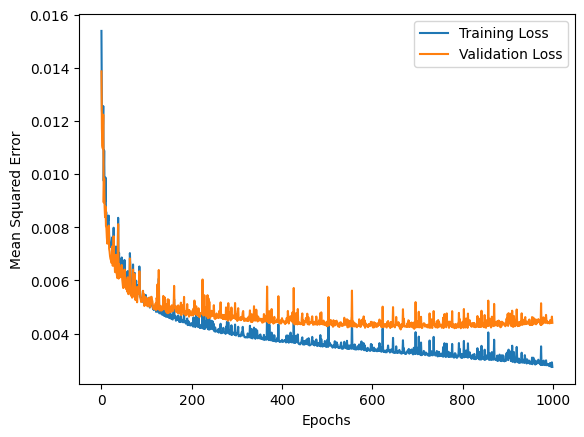

Predictions: [ 0.56452404  0.5503171   0.41925619  0.29581144  0.51489723  0.48476678
  0.47721431  0.62495566  0.37481155  0.28716193  0.48124423  0.34443381
  0.43470474  0.51715824  0.3418625   0.88032882  0.88801685  0.46327548
  0.46337286  0.52837232  0.28957653  0.66222228  0.4221737   0.66542519
  0.41708986  0.40212683  0.38323187 -0.11832307  0.56761343  0.46456983
  0.36505619  0.38081057  0.4971719   0.26605541  0.49062701  0.86090124
  0.219344    0.43565483  0.65317746  0.23740405  0.40014726  0.28431443
  0.19612431  0.41445245  0.40750036  0.13003524  0.30132171  0.38311849
  0.47762691  0.83603732  0.68600857  0.00676766  0.8632649   0.20312082
  0.32962736  0.31736319  0.21024351  0.61359138  0.36279499  0.63482387
  0.43402302  0.78481975  0.91842202  0.77029269  0.23207495  0.28132871
  0.43863997  0.61444288  0.24905646  0.54528095  0.62186396  0.80391258
  0.20105431  0.30751043  0.58360464  0.22444579  0.62716526  0.04596269
  0.5918888   0.51182874  0.41875668  

In [ ]:
train_loss, val_loss = nn.loss_epochs()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

predictions = nn.predict(Xn_test)
print("Predictions:", predictions.flatten())

### Real vs Predicted values before denormalization

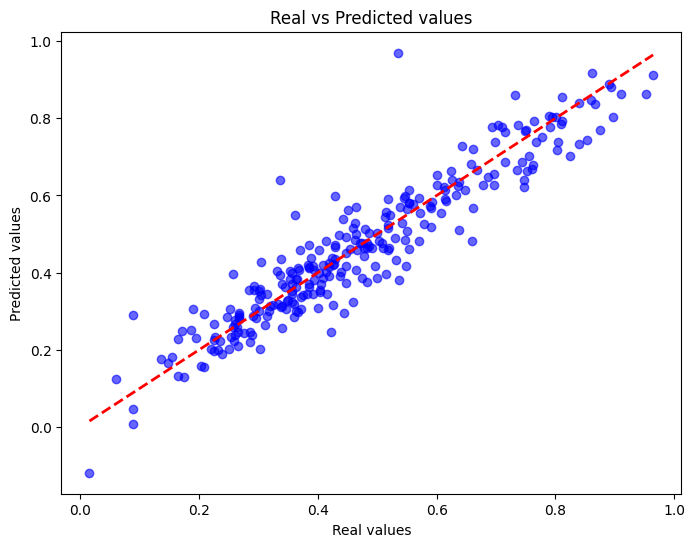

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, predictions, alpha=0.6, color='blue')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs Predicted values')
plt.show()

### Denormalization

In [ ]:
scaler_X.data_min_
scaler_X.data_max_

scaler_y.data_min_
scaler_y.data_max_

# X_train_denorm = scaler_X.inverse_transform(Xn_train)
# X_test_denorm  = scaler_X.inverse_transform(Xn_test)

y_train_denorm = scaler_y.inverse_transform(yn_train.reshape(-1,1))
y_test_denorm  = scaler_y.inverse_transform(yn_test.reshape(-1,1))

In [36]:
# predictions
pred_train = nn.predict(Xn_train)
pred_test = nn.predict(Xn_test)

In [ ]:
y_pred_test = scaler_y.inverse_transform(pred_test.reshape(-1,1))
y_pred_train = scaler_y.inverse_transform(pred_train.reshape(-1,1))

mape_train = np.mean(np.abs((y_train_denorm - y_pred_train) / y_train_denorm)) * 100
mape_test = np.mean(np.abs((y_test_denorm - y_pred_test) / y_test_denorm)) * 100

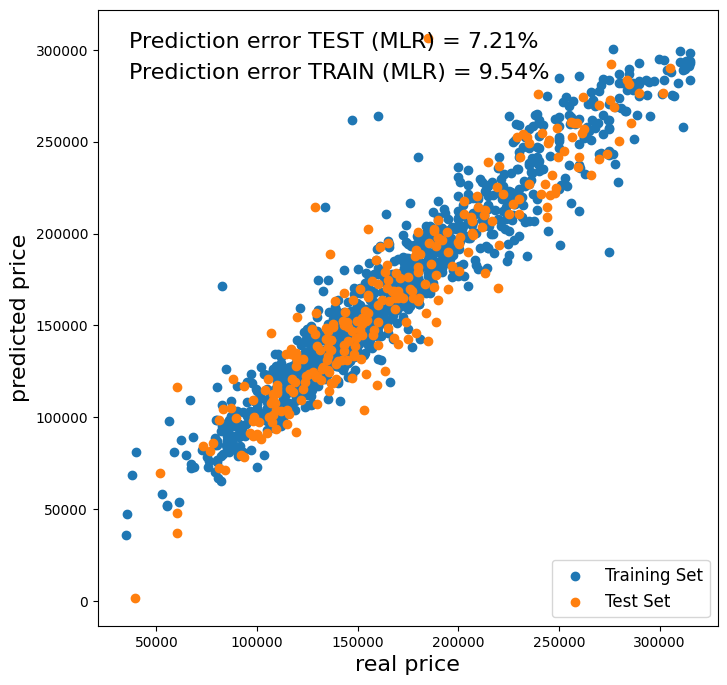

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_train, y_pred_train, label='Training Set')
ax.scatter(y_test, y_pred_test, label='Test Set')
ax.set_xlabel("real price", fontsize=16)
ax.set_ylabel("predicted price", fontsize=16)

# label text: fija el nombre correcto (TRAIN / TEST)
ax.text(0.05, 0.9, "Prediction error TEST (MLR) = %.2f%%\n" % mape_train, transform=ax.transAxes, fontsize=16)
ax.text(0.05, 0.85, "Prediction error TRAIN (MLR) = %.2f%%\n" % mape_test, transform=ax.transAxes, fontsize=16)

ax.legend(loc='lower right', fontsize=12)
plt.show()

### Optional part 2

In [43]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [46]:
from itertools import product

results = []   # store summary for each hyperparameter combination
all_predictions = {}  # optional: keep predictions per combo if you want to inspect later
grid_parameters = {
    'epochs': [300, 200],
    'learning_rate': [0.01, 0.001],
    'function': ['relu', 'tanh'],
}

for epochs, lr, func in product(grid_parameters['epochs'],
                                grid_parameters['learning_rate'],
                                grid_parameters['function']):
    fold_mse = []
    fold_mae = []
    fold_mape = []
    fold = 1
    print(f"Evaluating combination: epochs={epochs}, lr={lr}, func={func}")

    # run your existing CV for this hyperparameter combo
    for train_index, test_index in kf.split(Xn):
        Xn_train_kf, Xn_test_kf = Xn[train_index], Xn[test_index]
        yn_train_kf, yn_test_kf = yn[train_index], yn[test_index]

        # instantiate NN with the hyperparams for this grid point
        nn_kf = NeuralNet(
            layers=[Xn_train_kf.shape[1], 64, 32, 1],
            epochs=epochs,
            learning_rate=lr,
            function=func
        )

        nn_kf.fit(Xn_train_kf, yn_train_kf)
        preds = nn_kf.predict(Xn_test_kf)

        # ensure shapes align: flatten if needed
        preds = np.asarray(preds).reshape(-1)
        yn_test_kf = np.asarray(yn_test_kf).reshape(-1)

        fold_mse.append(mean_squared_error(preds, yn_test_kf))
        fold_mae.append(mean_absolute_error(preds, yn_test_kf))

        mape = np.mean(np.abs((yn_test_kf - preds) / yn_test_kf)) * 100
        fold_mape.append(mape)

        fold += 1

    fold_mse_value = np.mean(fold_mse)
    fold_mae_value = np.mean(fold_mae)
    fold_mape_value = np.mean(fold_mape)

    # store results
    combo_key = f"epochs={epochs}_lr={lr}_func={func}"
    results.append({
        'combo': combo_key,
        'epochs': epochs,
        'learning_rate': lr,
        'function': func,
        'mse': fold_mse_value,
        'mae': fold_mae_value,
        'mape': fold_mape_value
    })



Evaluating combination: epochs=300, lr=0.01, func=relu
Epoch 0/300 - Training Error: 0.248807 - Validation Error: 0.259635
Epoch 100/300 - Training Error: 0.248807 - Validation Error: 0.259635
Epoch 200/300 - Training Error: 0.248807 - Validation Error: 0.259635
Epoch 0/300 - Training Error: 0.007077 - Validation Error: 0.010722
Epoch 100/300 - Training Error: 0.001142 - Validation Error: 0.004741
Epoch 200/300 - Training Error: 0.000744 - Validation Error: 0.005135
Epoch 0/300 - Training Error: 0.005417 - Validation Error: 0.009639
Epoch 100/300 - Training Error: 0.001277 - Validation Error: 0.007997
Epoch 200/300 - Training Error: 0.000834 - Validation Error: 0.007242
Epoch 0/300 - Training Error: 0.008687 - Validation Error: 0.009970
Epoch 100/300 - Training Error: 0.002421 - Validation Error: 0.004918
Epoch 200/300 - Training Error: 0.000993 - Validation Error: 0.003478
Epoch 0/300 - Training Error: 0.006324 - Validation Error: 0.009251
Epoch 100/300 - Training Error: 0.001328 - Va

In [47]:
results_sorted = sorted(results, key=lambda x: x['mse'])
for r in results_sorted:
    print(f"{r['combo']}: MSE={r['mse']:.4f}, MAE={r['mae']:.4f}, MAPE={r['mape']:.4f}")

epochs=300_lr=0.01_func=tanh: MSE=0.0035, MAE=0.0417, MAPE=9.5409
epochs=300_lr=0.001_func=tanh: MSE=0.0037, MAE=0.0438, MAPE=10.0405
epochs=200_lr=0.01_func=tanh: MSE=0.0040, MAE=0.0448, MAPE=10.3865
epochs=200_lr=0.001_func=tanh: MSE=0.0042, MAE=0.0460, MAPE=10.5346
epochs=300_lr=0.001_func=relu: MSE=0.0519, MAE=0.1305, MAPE=28.5219
epochs=300_lr=0.01_func=relu: MSE=0.0536, MAE=0.1332, MAPE=28.9506
epochs=200_lr=0.001_func=relu: MSE=0.1034, MAE=0.2180, MAPE=46.1425
epochs=200_lr=0.01_func=relu: MSE=0.1483, MAE=0.3011, MAPE=64.3159


# Optional part 3

## XGBoost

### Before Grid search

In [48]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(Xn_train, yn_train)
xgb_predictions = xgb_model.predict(Xn_test)

mse_xgb = mean_squared_error(yn_test, xgb_predictions)
r2_score_xgb = r2_score(yn_test, xgb_predictions)

print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost R2 Score: {r2_score_xgb:.4f}")

XGBoost MSE: 0.0063
XGBoost R2 Score: 0.8332


Text(0.5, 1.0, 'XGBoost: Real vs Predicted values before Grid Search')

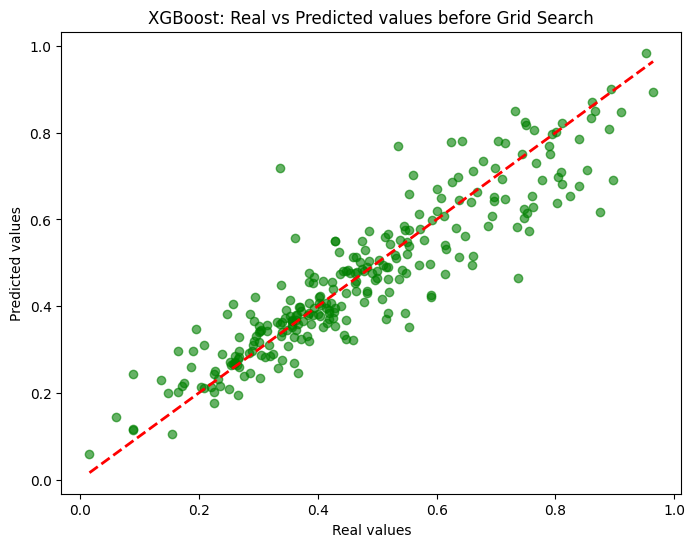

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, xgb_predictions, alpha=0.6, color='green')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('XGBoost: Real vs Predicted values before Grid Search')

### After grid search

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid=param_grid)
grid_search.fit(Xn_train, yn_train)

grid_search.best_params_
best_xgb_model = grid_search.best_estimator_
print("Best XGBoost Parameters:", grid_search.best_params_)

best_xgb_predictions = best_xgb_model.predict(Xn_test)

best_mse_xgb = mean_squared_error(yn_test, best_xgb_predictions)
best_r2_score_xgb = r2_score(yn_test, best_xgb_predictions)

print(f"Best XGBoost MSE after Grid Search: {best_mse_xgb:.4f}")
print(f"Best XGBoost R2 Score after Grid Search: {best_r2_score_xgb:.4f}")

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best XGBoost MSE after Grid Search: 0.0048
Best XGBoost R2 Score after Grid Search: 0.8724


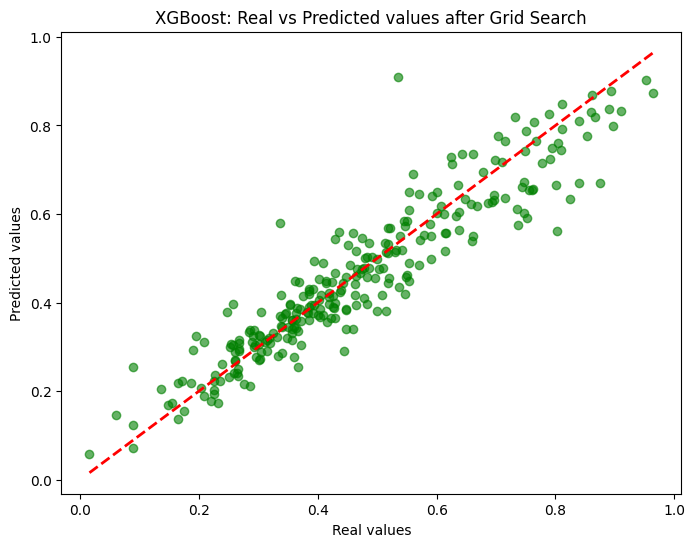

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, best_xgb_predictions, alpha=0.6, color='green')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('XGBoost: Real vs Predicted values after Grid Search')
plt.show()

## Random forest regressor

### Before Grid Search

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(Xn_train, yn_train)
rf_predictions = rf_model.predict(Xn_test)

mse_rf = mean_squared_error(yn_test, rf_predictions)
r2_score_rf = r2_score(yn_test, rf_predictions)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest R2 Score: {r2_score_rf:.4f}")

Random Forest MSE: 0.0057
Random Forest R2 Score: 0.8472


Text(0.5, 1.0, 'Random Forest: Real vs Predicted values before Grid Search')

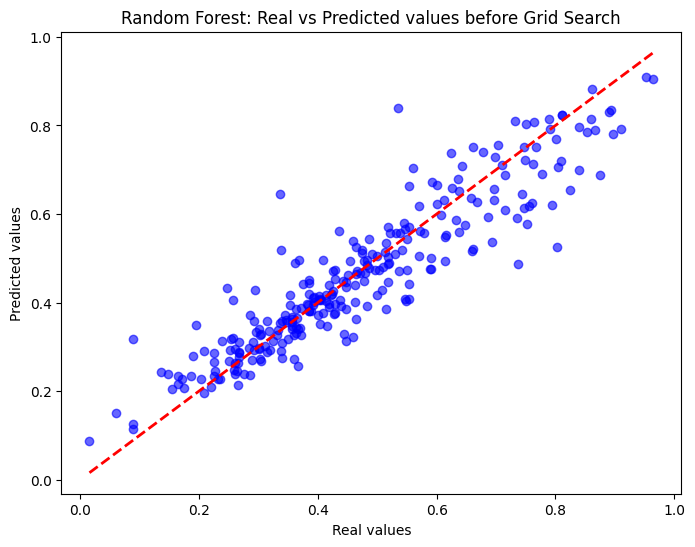

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, rf_predictions, alpha=0.6, color='blue')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Random Forest: Real vs Predicted values before Grid Search')

### After Grid Search 

In [54]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid)
grid_search_rf.fit(Xn_train, yn_train)

grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

best_rf_predictions = best_rf_model.predict(Xn_test)
best_mse_rf = mean_squared_error(yn_test, best_rf_predictions)
best_r2_score_rf = r2_score(yn_test, best_rf_predictions)

print(f"Best Random Forest MSE after Grid Search: {best_mse_rf:.4f}")
print(f"Best Random Forest R2 Score after Grid Search: {best_r2_score_rf:.4f}")

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest MSE after Grid Search: 0.0057
Best Random Forest R2 Score after Grid Search: 0.8474


Text(0.5, 1.0, 'Random Forest: Real vs Predicted values after Grid Search')

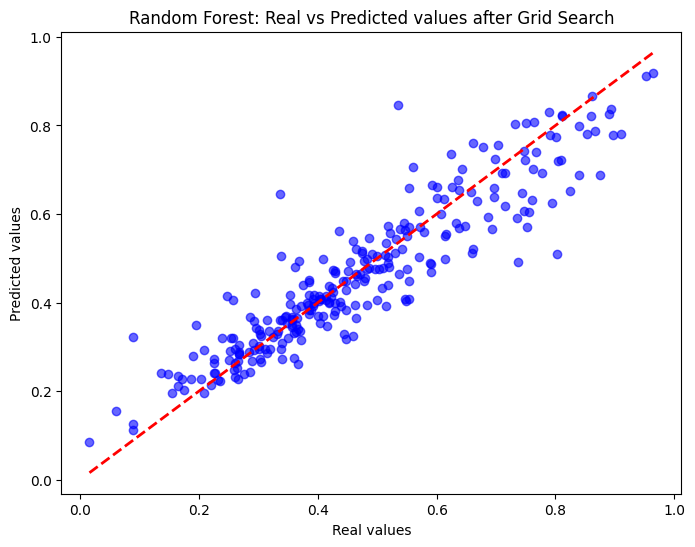

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(yn_test, best_rf_predictions, alpha=0.6, color='blue')
plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], 'r--', lw=2)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Random Forest: Real vs Predicted values after Grid Search')